# 회귀 - 캘리포니아 하우징

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
from sklearn.datasets import fetch_california_housing
house = fetch_california_housing()

In [3]:
df = pd.DataFrame(house.data, columns=house.feature_names)
df['target'] = house.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.shape

(20640, 9)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    house.data, house.target, test_size=0.2, random_state=seed
)

- 회귀모델 정의/설정/학습/평가

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
model = Sequential([
    Dense(20, input_dim=8, activation='relu'),
    Dense(6, activation='relu'),
    Dense(1)                                    # 회귀에서는 출력층에 활성화함수를 사용하지 않음
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20)                180       
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 126       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 313
Trainable params: 313
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='rmsprop', loss='mean_squared_error')        # 회귀에서는 metrics 사용하지 않음

In [10]:
hist = model.fit(X_train, y_train, validation_split=0.1,
                            epochs=100, batch_size=256)

Train on 14860 samples, validate on 1652 samples
Epoch 1/100
14860/14860 [==============================] - 1s 96us/sample - loss: 119.7981 - val_loss: 11.7457
Epoch 2/100
14860/14860 [==============================] - 0s 23us/sample - loss: 3.0829 - val_loss: 1.6505
Epoch 3/100
14860/14860 [==============================] - 0s 13us/sample - loss: 2.5424 - val_loss: 5.1262
Epoch 4/100
14860/14860 [==============================] - 0s 12us/sample - loss: 2.5149 - val_loss: 2.4021
Epoch 5/100
14860/14860 [==============================] - 0s 11us/sample - loss: 2.6275 - val_loss: 1.4104
Epoch 6/100
14860/14860 [==============================] - 0s 20us/sample - loss: 2.4051 - val_loss: 1.8221
Epoch 7/100
14860/14860 [==============================] - 0s 14us/sample - loss: 2.3820 - val_loss: 3.6006
Epoch 8/100
14860/14860 [==============================] - 0s 12us/sample - loss: 2.2602 - val_loss: 1.9167
Epoch 9/100
14860/14860 [==============================] - 0s 10us/sample - loss: 2.

- 학습과정 시각화

In [11]:
y_loss = hist.history['loss']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_loss)+1)

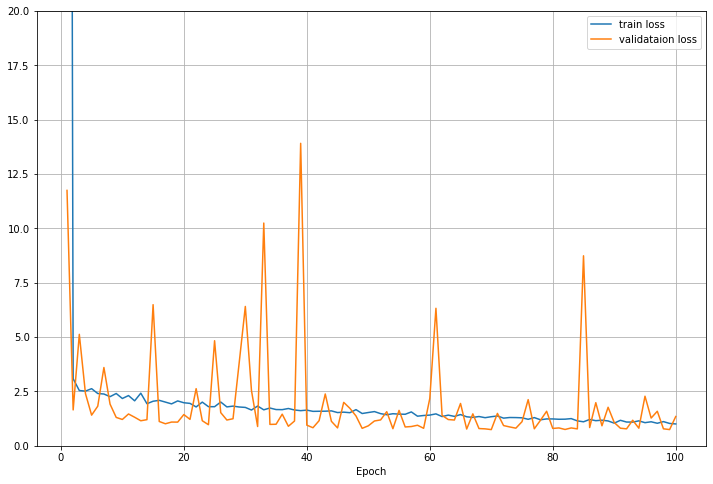

In [15]:
plt.figure(figsize=(12, 8))
plt.plot(xs, y_loss, label='train loss')
plt.plot(xs, y_vloss, label='validataion loss')
plt.legend(), plt.grid(), plt.ylim(0, 20)
plt.xlabel('Epoch')
plt.show()

- 평가

In [16]:
pred = model.predict(X_test)

In [18]:
dft = pd.DataFrame({'y_test': y_test, 'pred': pred.flatten()})
dft.head()

,y_test,pred
0,4.771,2.017132
1,1.371,1.064225
2,1.233,0.458631
3,0.938,1.259970
4,3.260,2.243690


In [19]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test, pred), r2_score(y_test, pred)

(1.4305580012082588, -0.10545565941115642)